<a href="https://colab.research.google.com/github/estoymukundjha/Cardiovascular-Risk-Pediction/blob/main/Risk_Pridiction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Real world objective and constraints.



*   No low-latency requirement.
*   Model interpretability is important.
*   Error can be very costly so 'false negative' should be minimum.
*   Probability of a data-point belonging to each class is needed.


#2. Data Description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

##3.1 Type of Machine Learning Problem
There are two different classes of "10-year risk of coronary heart disease CHD" so here we have a **binary classification** problem.

##3.2 Performace Metric


*   Binary log-loss
*   Confusion Matrix

#4. Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/data_cardiovascular_risk.csv")
df = pd.DataFrame(data)

##4.1 Understanding Data

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can beconsidered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['education', 'sex','is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

##4.2 Data Analysis

#### Checking class imbalance

In [ ]:
duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


#### Checking class imbalance

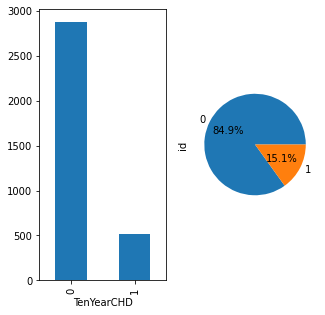

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(121)
df.groupby("TenYearCHD")['id'].count().plot.bar()

plt.subplot(122)
df.groupby("TenYearCHD")["id"].count().plot.pie(autopct='%1.1f%%',figsize=(5,5))

plt.show()

####Univariate Analysis

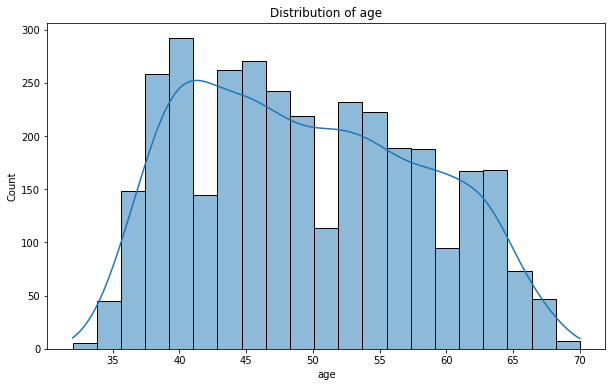

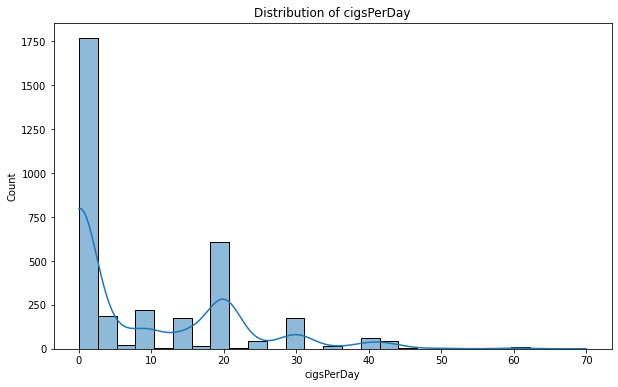

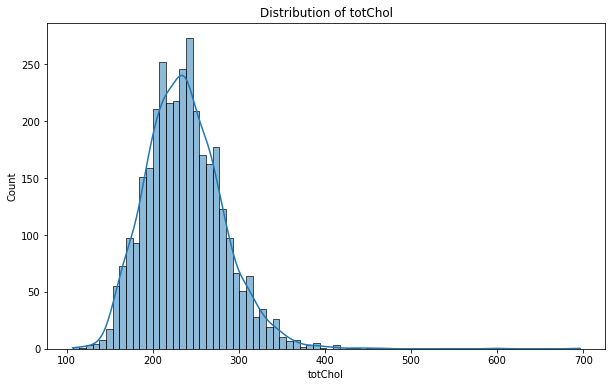

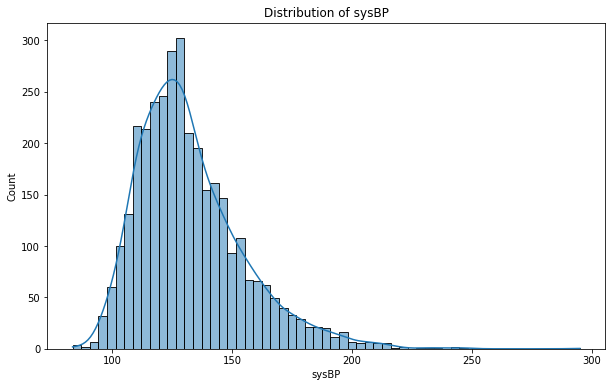

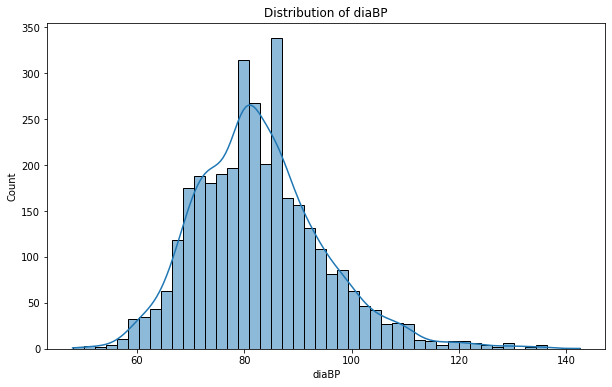

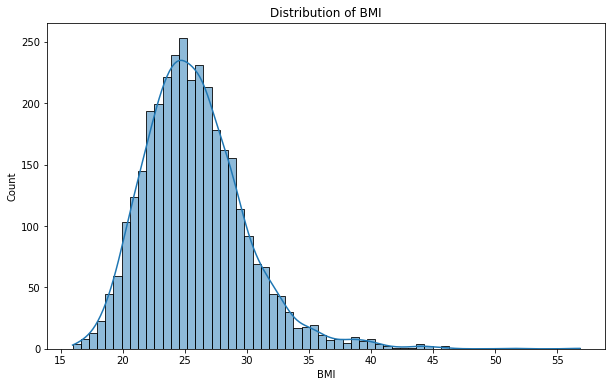

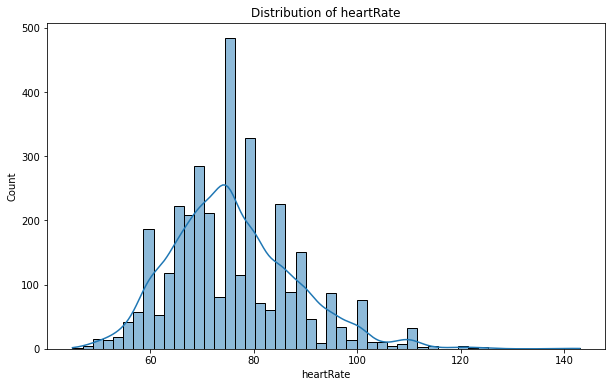

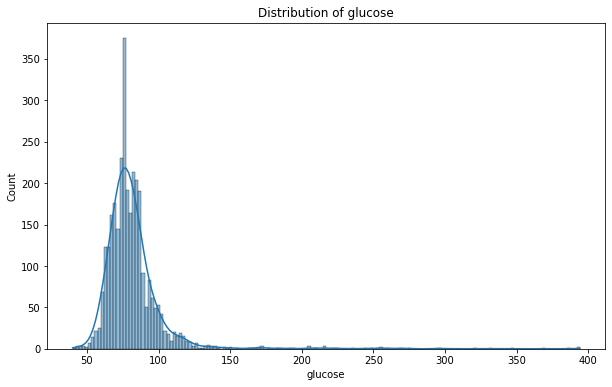

In [ ]:
for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  sns.histplot(data=df, x=ii, kde=True)
  plt.title(f'Distribution of {ii}')
  plt.show()

As rule of thumb, skewness can be interpreted like this: 

    Skewness
* Fairly Symmetrical	-0.5 to 0.5
* Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
* Highly Skewed	< -1.0 and > 1.0

<Figure size 720x432 with 0 Axes>

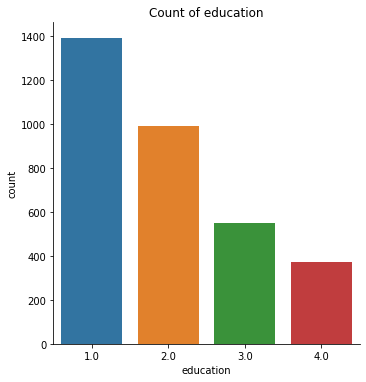

<Figure size 720x432 with 0 Axes>

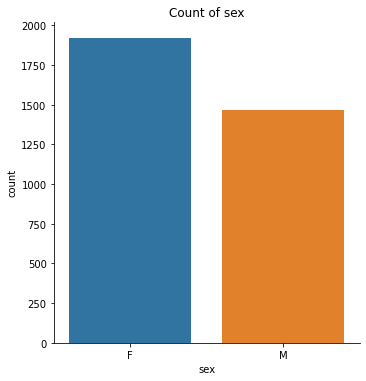

<Figure size 720x432 with 0 Axes>

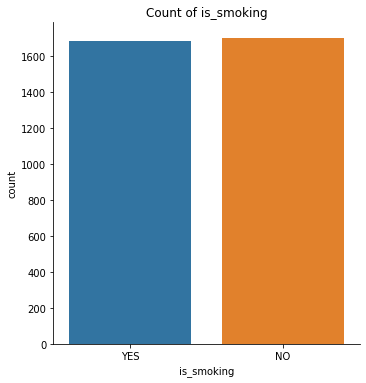

<Figure size 720x432 with 0 Axes>

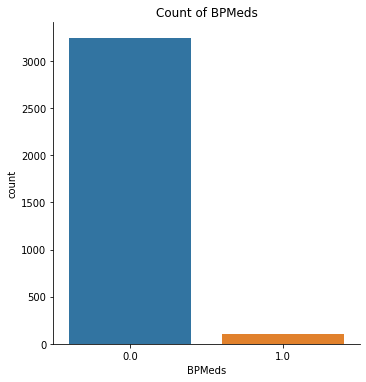

<Figure size 720x432 with 0 Axes>

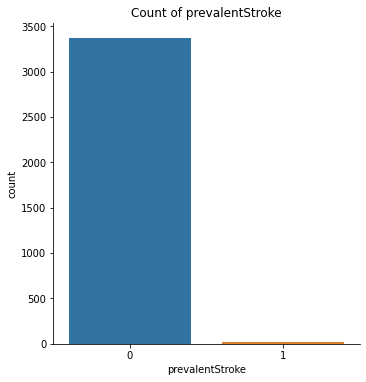

<Figure size 720x432 with 0 Axes>

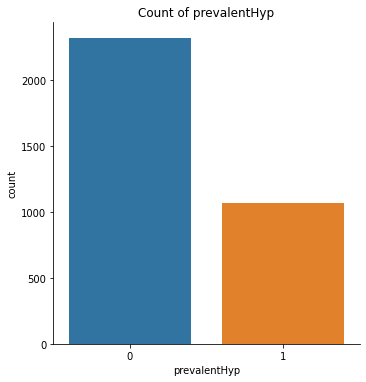

<Figure size 720x432 with 0 Axes>

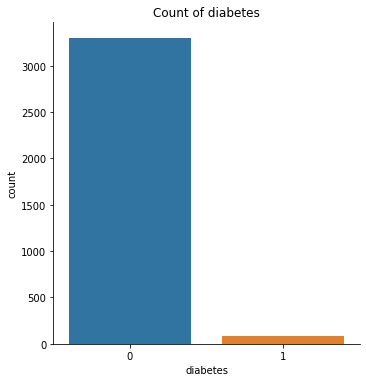

<Figure size 720x432 with 0 Axes>

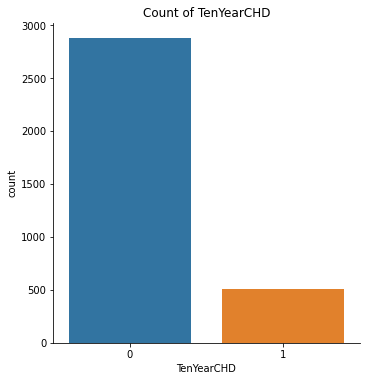

In [ ]:
for i, ii in enumerate(cat_cols):
  plt.figure(figsize = (10,6))
  sns.catplot(data=df, x=ii, kind='count')
  plt.title(f'Count of {ii}')
  plt.show()

####Bivariate Analysis

<Figure size 720x432 with 0 Axes>

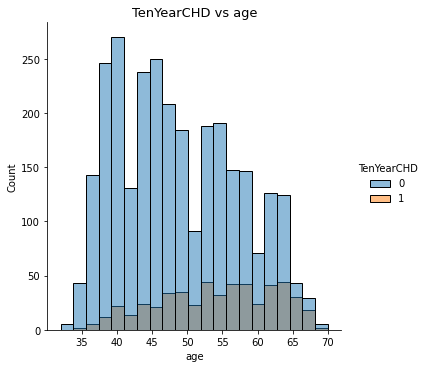

<Figure size 720x432 with 0 Axes>

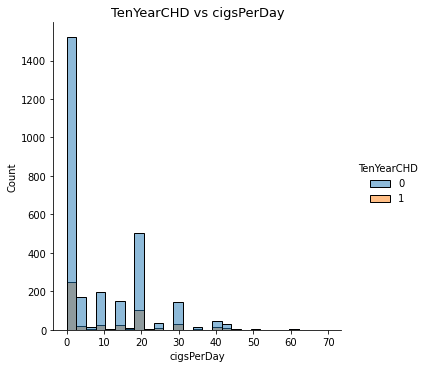

<Figure size 720x432 with 0 Axes>

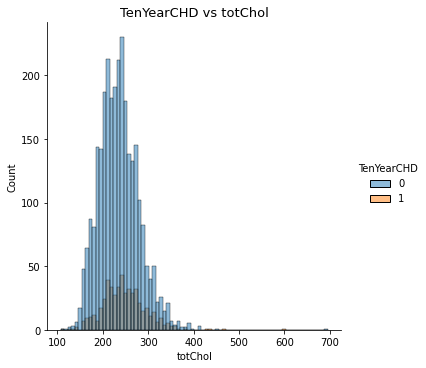

<Figure size 720x432 with 0 Axes>

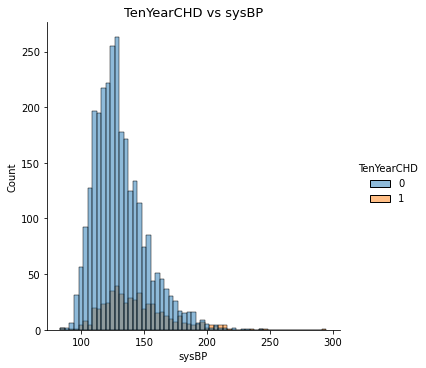

<Figure size 720x432 with 0 Axes>

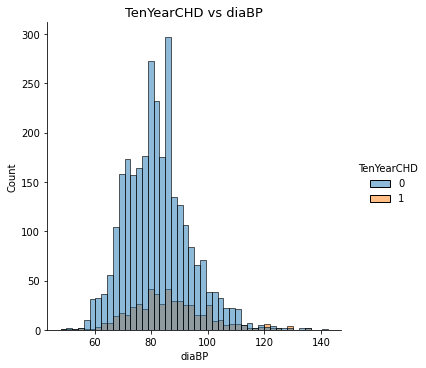

<Figure size 720x432 with 0 Axes>

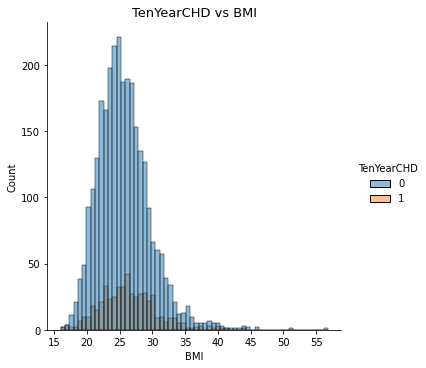

<Figure size 720x432 with 0 Axes>

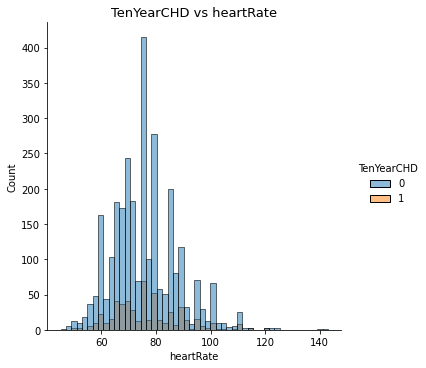

<Figure size 720x432 with 0 Axes>

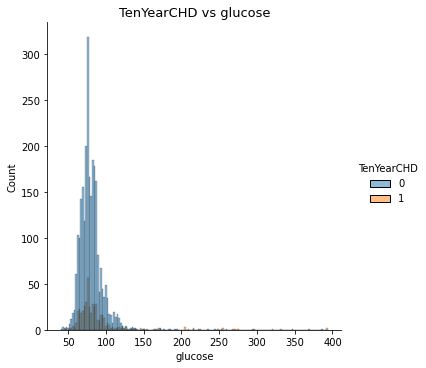

In [ ]:
for i, ii in enumerate(num_cols):
  plt.figure(figsize = (10,6))
  #sns.distplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

<Figure size 720x432 with 0 Axes>

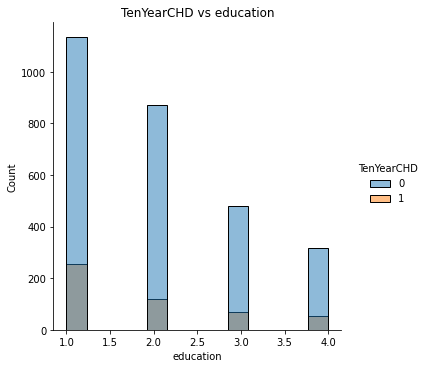

<Figure size 720x432 with 0 Axes>

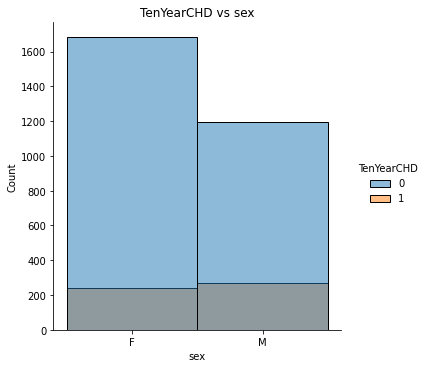

<Figure size 720x432 with 0 Axes>

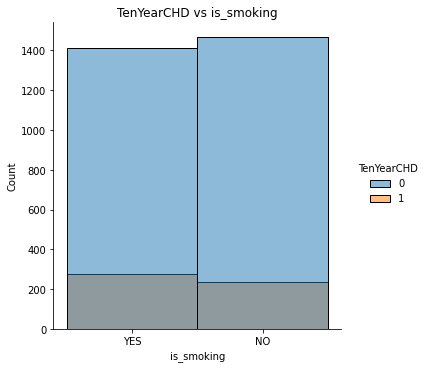

<Figure size 720x432 with 0 Axes>

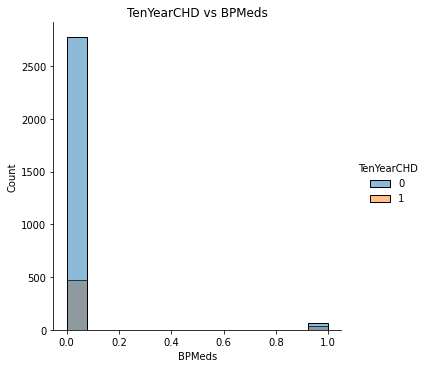

<Figure size 720x432 with 0 Axes>

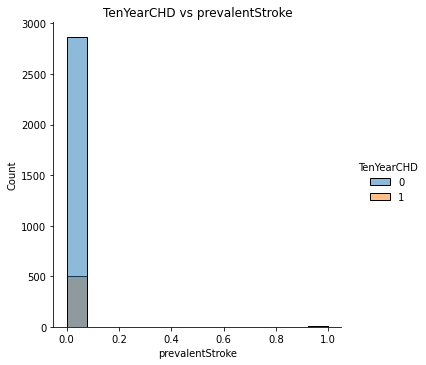

<Figure size 720x432 with 0 Axes>

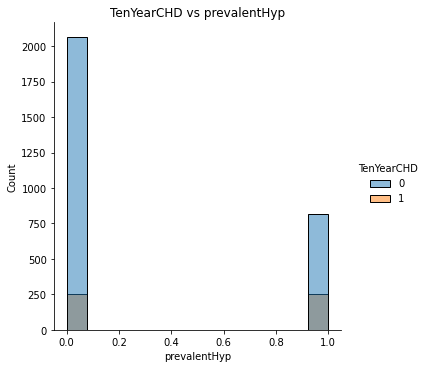

<Figure size 720x432 with 0 Axes>

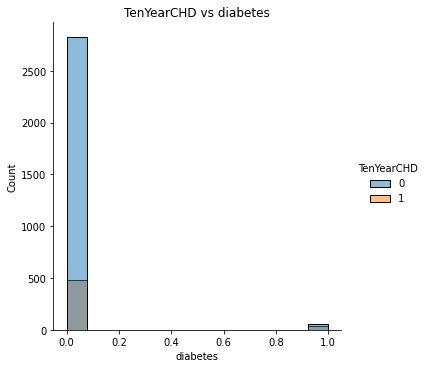

In [ ]:
# Dependent variable vs categorical features

for i, ii in enumerate(cat_cols[:-1]):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

In [ ]:
# pairplot - for numerical features

#sns.pairplot(data=df, vars=num_cols, hue=cat_cols[-1])
#plt.show()

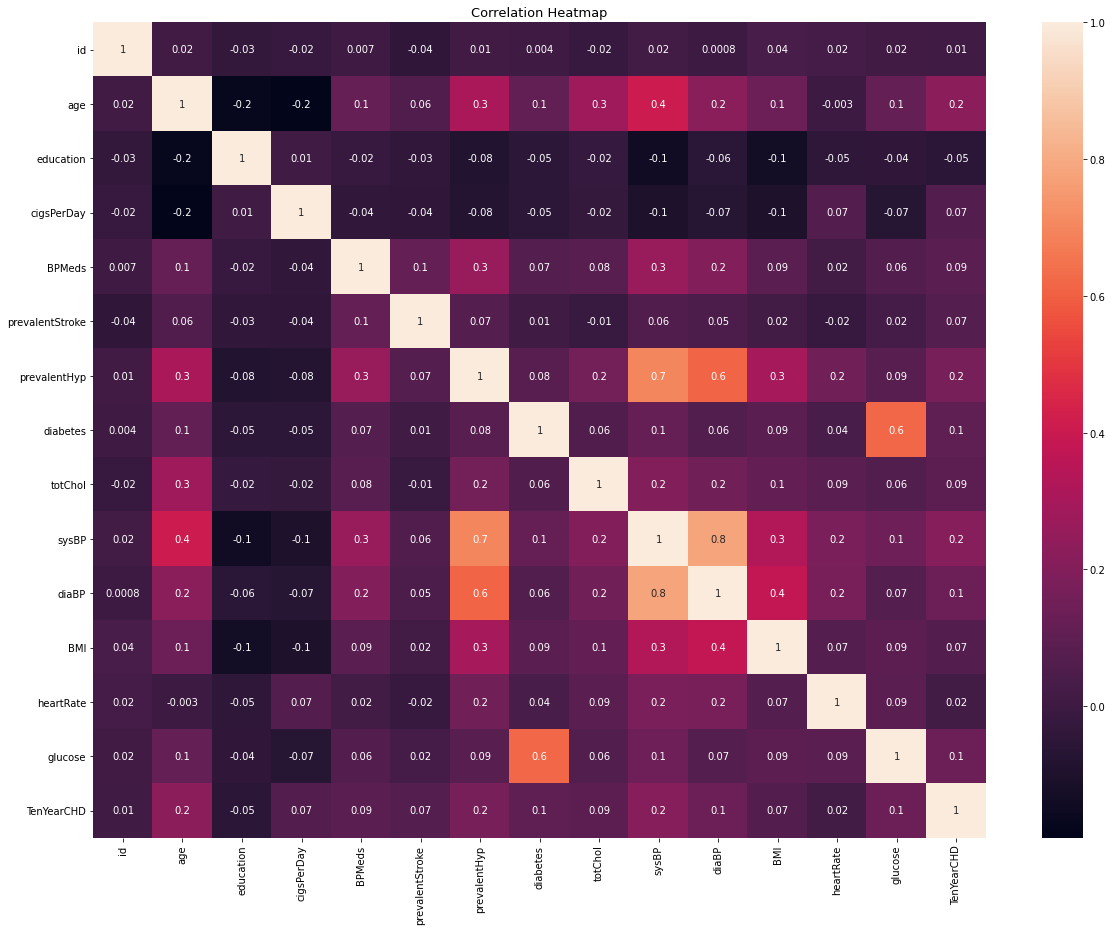

In [ ]:
# Correlation Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, fmt='.1g')
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

#5. Pre-Processing

In [ ]:
# Dropping id column

df.drop('id', inplace=True, axis=1)

In [ ]:
df['sex'] = df['sex'].map(dict(M=1, F=0))
df['is_smoking'] = df['is_smoking'].map(dict(YES=1, NO=0))

In [ ]:
df.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


####5.1 SMOTE

#### Filling NAN values

In [ ]:
df['education'].fillna(1,inplace=True)
df['cigsPerDay'].fillna(10,inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(234,inplace=True)
df['BMI'].fillna(25,inplace=True)
df['heartRate'].fillna(75,inplace=True)
df['glucose'].fillna(82,inplace=True)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Feature Selection

In [ ]:
df.drop(['education','is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes'], inplace=True, axis=1)

In [ ]:
df.head()

,age,sex,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,3.0,221.0,148.0,85.0,25.00,90.0,80.0,1
1,36,1,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
train_df.head()

,age,sex,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2134,54,0,0.0,272.0,146.0,95.0,23.66,72.0,80.0,0
1161,37,1,9.0,237.0,102.0,72.0,19.68,67.0,83.0,0
137,39,1,43.0,291.0,177.5,100.0,25.74,67.0,91.0,0
2170,55,0,0.0,225.0,136.5,85.5,20.56,60.0,90.0,0
2876,59,1,0.0,237.0,131.5,84.0,24.17,90.0,94.0,1


In [ ]:
X = df.drop(labels = ['TenYearCHD'], axis = 1)
Y = df['TenYearCHD']

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# transform the dataset
x_smote, y_smote = pipeline.fit_resample(X, Y)


#the numbers after SMOTE
after_smote =dict(Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_smote.shape

(5181,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


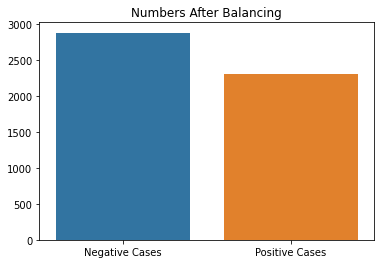

In [ ]:
labels = ["Negative Cases","Positive Cases"]
sns.barplot(labels, list(after_smote.values()))
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
x_smote.shape

(5181, 9)

In [ ]:
X = pd.DataFrame(x_smote)
Y = pd.DataFrame(y_smote)

In [ ]:
X.shape

(5181, 9)

In [ ]:
X.columns = ['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
Y.columns = ['TenYearCHD']

In [ ]:
# Defining X and Y test
'''X = .drop(labels = ['TenYearCHD'], axis = 1)
Y = ['TenYearCHD']'''

"X = .drop(labels = ['TenYearCHD'], axis = 1)\nY = ['TenYearCHD']"

In [ ]:
Y.shape

(5181, 1)

In [ ]:
#splitting the data into train and test
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = False)

####Splitting Train and Test

In [ ]:
scaler = StandardScaler()

#x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaler.fit_transform(x_train))

#x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(scaler.transform(x_test))

#Model Creation

In [ ]:

def plot_confusion_matrix(test_y, pridict_y):
    C = confusion_matrix(test_y, pridict_y)
    
    A = (((C.T)/(C.sum(axis=1))).T) # Recall Matrix
    
    B = (C/C.sum(axis=0)) # precision matrix
    
    plt.figure(figsize=(20,5))
    labels = [1,2]
    cmap = sns.light_palette("red")
    
    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Confusion Matrix")
    
    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Precision Matrix")
    
    plt.subplot(1,3,3)
    sns.heatmap(A, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Recall Matrix")
    
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score , log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.0001, 0.001,0.1, 1, 10, 100,], 
              'gamma': [0.0001, 0.001, 0.01, 1, 10, 100],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=0.0001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.0001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.0001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.0001, gamma=10, kernel=rbf, score=0.550, total=   0.5s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.0001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.0001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.0001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.0001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=100, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.0001, gamma=100, kernel=rbf, score=0.550, total=   0.5s
[CV] C=0.0001, gamma=100, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.0001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=100, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.0001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=100, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.0001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.0001, gamma=100, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.0001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.550, total=   0.5s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=10, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.550, total=   0.5s
[CV] C=0.001, gamma=10, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=10, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=10, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=10, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=100, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.001, gamma=100, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=100, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=100, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.001, gamma=100, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.551, total=   0.5s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.550, total=   0.5s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.556, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.559, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.556, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.555, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.557, total=   0.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.690, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.678, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.665, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.645, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.676, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.577, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.574, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.575, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.585, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.568, total=   0.6s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.550, total=   0.7s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.551, total=   0.7s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.551, total=   0.7s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.551, total=   0.7s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.551, total=   0.7s
[CV] C=0.1, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.550, total=   0.6s
[CV] C=0.1, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.551, total=   0.6s
[CV] C=0.1, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.551, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.560, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.555, total=   0.6s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.560, total=   0.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.690, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.671, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.671, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.645, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.674, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.698, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.702, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.655, total=   0.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.688, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.877, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.878, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.891, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.876, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.886, total=   0.7s
[CV] C=1, gamma=10, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.773, total=   0.8s
[CV] C=1, gamma=10, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.760, total=   0.8s
[CV] C=1, gamma=10, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.767, total=   0.8s
[CV] C=1, gamma=10, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.754, total=   0.8s
[CV] C=1, gamma=10, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.763, total=   0.8s
[CV] C=1, gamma=100, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=100, kernel=rbf, score=0.634, total=   0.7s
[CV] C=1, gamma=100, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=100, kernel=rbf, score=0.643, total=   0.7s
[CV] C=1, gamma=100, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=100, kernel=rbf, score=0.633, total=   0.7s
[CV] C=1, gamma=100, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=100, kernel=rbf, score=0.633, total=   0.7s
[CV] C=1, gamma=100, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=100, kernel=rbf, score=0.624, total=   0.7s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.690, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.671, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.672, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.645, total=   0.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.671, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.694, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.682, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.680, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.650, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.676, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.702, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.721, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.709, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.665, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.717, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.861, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.891, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.905, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.876, total=   0.7s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.891, total=   0.8s
[CV] C=10, gamma=10, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=10, kernel=rbf, score=0.797, total=   0.7s
[CV] C=10, gamma=10, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=10, kernel=rbf, score=0.777, total=   0.7s
[CV] C=10, gamma=10, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=10, kernel=rbf, score=0.783, total=   0.7s
[CV] C=10, gamma=10, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=10, kernel=rbf, score=0.778, total=   0.7s
[CV] C=10, gamma=10, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=10, gamma=10, kernel=rbf, score=0.774, total=   0.7s
[CV] C=10, gamma=100, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=100, kernel=rbf, score=0.647, total=   0.7s
[CV] C=10, gamma=100, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=100, kernel=rbf, score=0.651, total=   0.7s
[CV] C=10, gamma=100, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=100, kernel=rbf, score=0.648, total=   0.7s
[CV] C=10, gamma=100, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=100, kernel=rbf, score=0.643, total=   0.7s
[CV] C=10, gamma=100, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=100, kernel=rbf, score=0.635, total=   0.7s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.695, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.679, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.683, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.645, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.676, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.702, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.696, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.690, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.657, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.686, total=   0.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.732, total=   0.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.742, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.741, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.720, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.737, total=   0.8s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.861, total=   0.8s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.891, total=   0.8s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.906, total=   0.8s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.881, total=   0.7s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.891, total=   0.8s
[CV] C=100, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=10, kernel=rbf, score=0.797, total=   0.7s
[CV] C=100, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=10, kernel=rbf, score=0.777, total=   0.7s
[CV] C=100, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=10, kernel=rbf, score=0.783, total=   0.7s
[CV] C=100, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=10, kernel=rbf, score=0.778, total=   0.7s
[CV] C=100, gamma=10, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=100, gamma=10, kernel=rbf, score=0.774, total=   0.7s
[CV] C=100, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=100, kernel=rbf, score=0.647, total=   0.7s
[CV] C=100, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=100, kernel=rbf, score=0.651, total=   0.7s
[CV] C=100, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=100, kernel=rbf, score=0.648, total=   0.7s
[CV] C=100, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=100, kernel=rbf, score=0.643, total=   0.7s
[CV] C=100, gamma=100, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=100, kernel=rbf, score=0.635, total=   0.7s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10, 100],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.95      0.88      0.92       595
           1       0.86      0.94      0.90       442

    accuracy                           0.91      1037
   macro avg       0.90      0.91      0.91      1037
weighted avg       0.91      0.91      0.91      1037



##XGBoost

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.686222	valid-logloss:0.6867
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.629166	valid-logloss:0.634047
[20]	train-logloss:0.588396	valid-logloss:0.596732
[30]	train-logloss:0.558445	valid-logloss:0.56909
[40]	train-logloss:0.534989	valid-logloss:0.547203
[50]	train-logloss:0.516198	valid-logloss:0.529881
[60]	train-logloss:0.500942	valid-logloss:0.516011
[70]	train-logloss:0.488458	valid-logloss:0.504467
[80]	train-logloss:0.477906	valid-logloss:0.495413
[90]	train-logloss:0.468848	valid-logloss:0.487576
[100]	train-logloss:0.460488	valid-logloss:0.480474
[110]	train-logloss:0.453383	valid-logloss:0.474236
[120]	train-logloss:0.447085	valid-logloss:0.468918
[130]	train-logloss:0.440424	valid-logloss:0.462935
[140]	train-logloss:0.433819	valid-logloss:0.457134
[150]	train-logloss:0.427992	valid-logloss:0.452356
[160]	train-logloss:0.422391	va

Total number of data points : 1037


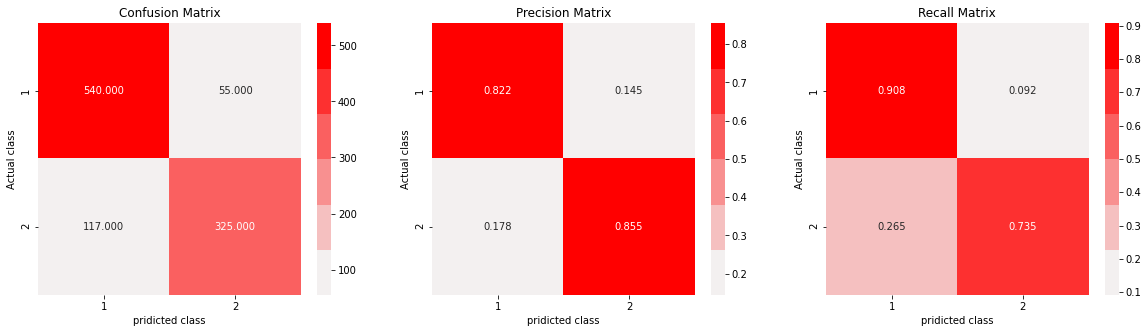

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       595
           1       0.86      0.74      0.79       442

    accuracy                           0.83      1037
   macro avg       0.84      0.82      0.83      1037
weighted avg       0.84      0.83      0.83      1037

